<a href="https://colab.research.google.com/github/ParvathiSant/project/blob/main/Loan_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import modules & Dataset

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

df=pd.read_csv("/content/archive (17).zip")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [72]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


Preprocessing the dataset

In [73]:
#finding the missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [75]:
#filling the missing values using mean for categorical terms
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [76]:
#filling the missing values using mode for numerical terms
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [77]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


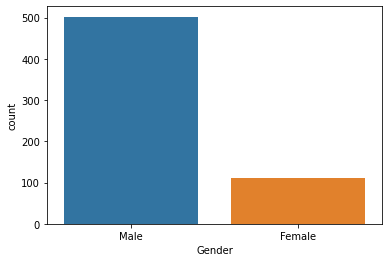

In [78]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


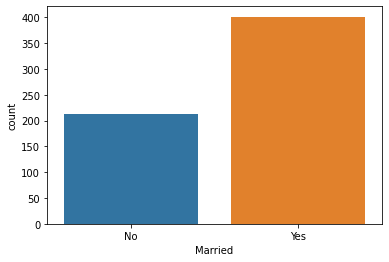

In [79]:
sns.countplot(df['Married'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


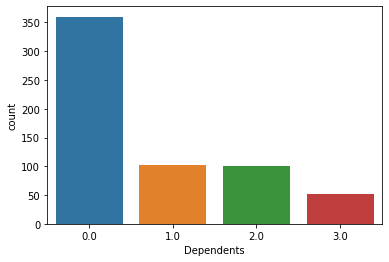

In [80]:
sns.countplot(df['Dependents'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


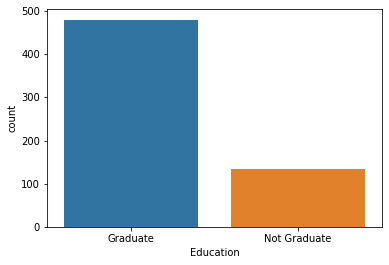

In [81]:
sns.countplot(df['Education'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


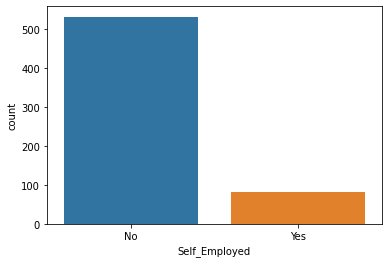

In [82]:
sns.countplot(df['Self_Employed'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


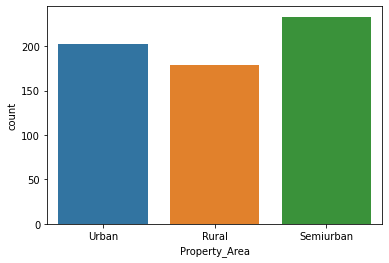

In [83]:
sns.countplot(df['Property_Area'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


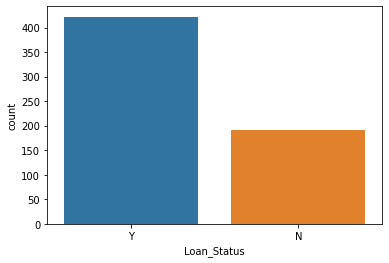

In [84]:
sns.countplot(df['Loan_Status'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


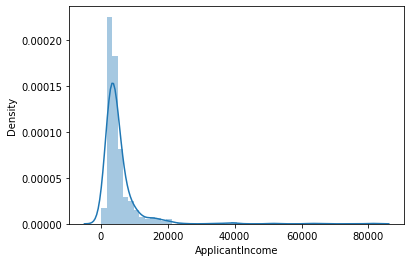

In [85]:
sns.distplot(df["ApplicantIncome"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


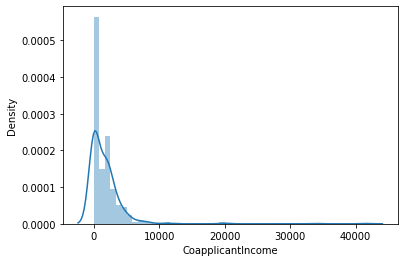

In [86]:
sns.distplot(df["CoapplicantIncome"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


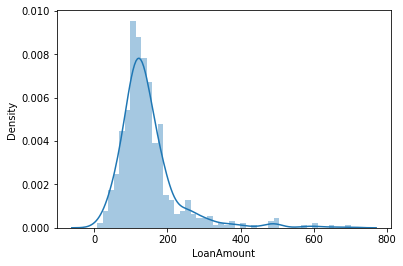

In [87]:
sns.distplot(df["LoanAmount"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


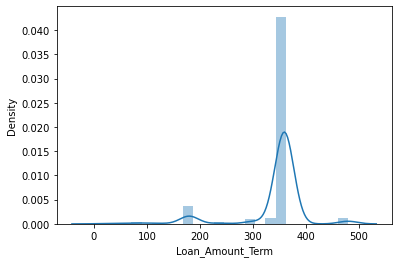

In [88]:
sns.distplot(df["Loan_Amount_Term"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


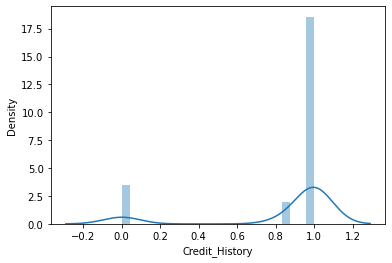

In [89]:
sns.distplot(df["Credit_History"])

Creation of new columns

In [90]:
df['Total_income']=df["ApplicantIncome"]+df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


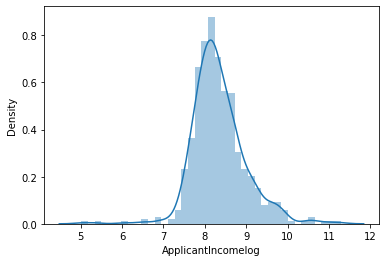

In [91]:
df['ApplicantIncomelog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomelog'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


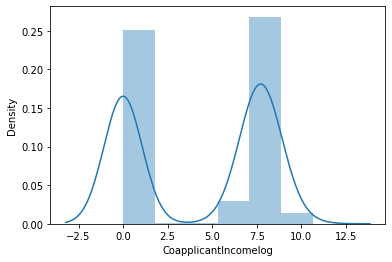

In [92]:
df['CoapplicantIncomelog']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomelog'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


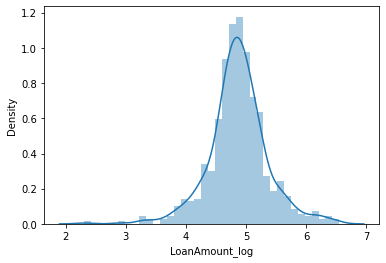

In [93]:
df['LoanAmount_log']=np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmount_log"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


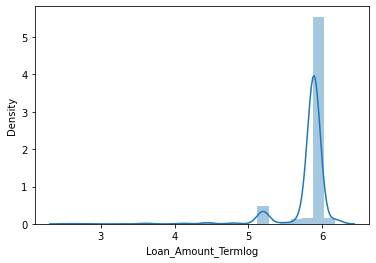

In [94]:
df['Loan_Amount_Termlog']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Termlog'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


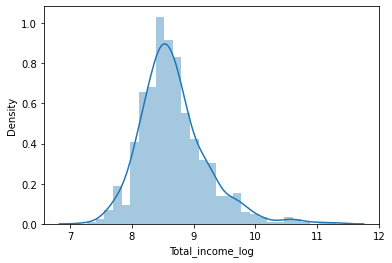

In [95]:
df['Total_income_log']=np.log(df['Total_income']+1)
sns.distplot(df['Total_income_log'])

Coorelation Matrix

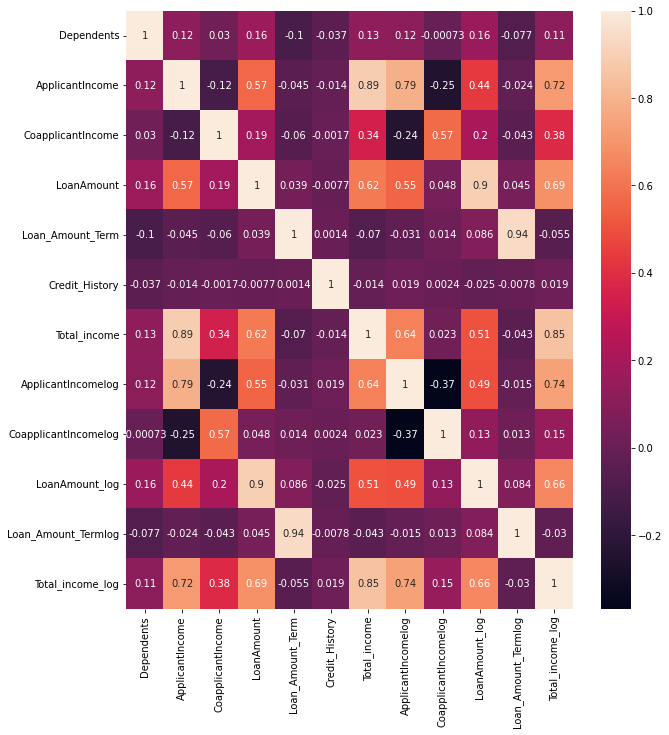

In [96]:
corr=df.corr()
plt.figure(figsize=(10,11))
sns.heatmap(corr,annot=True,color='red')

In [97]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmount_log,Loan_Amount_Termlog,Total_income_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [104]:
#Drop unnecessary columns
column=['ApplicantIncome','LoanAmount','CoapplicantIncome','Loan_Amount_Term','Total_income','CoapplicantIncomelog','Loan_ID']
df.drop(columns=column,axis=1,inplace=True)

In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmount_log,Loan_Amount_Termlog,Total_income_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


Label Encoding


In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for column in cols:
  df[column]=le.fit_transform(df[column])

In [100]:
df.head()
#yes=1
#no=0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmount_log,Loan_Amount_Termlog,Total_income_log
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [111]:
x=df.drop(columns=['Loan_Status'],axis=1).values
y=df['Loan_Status'].values


Train_Test_split

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
x_train

array([[1.        , 1.        , 3.        , ..., 5.23644196, 5.88887796,
        8.85950548],
       [1.        , 0.        , 1.        , ..., 4.73619845, 5.19849703,
        8.20740183],
       [1.        , 1.        , 0.        , ..., 4.82831374, 5.70711026,
        8.57508467],
       ...,
       [1.        , 0.        , 0.        , ..., 4.40671925, 5.70711026,
        8.16080392],
       [1.        , 1.        , 1.        , ..., 5.14166356, 5.88887796,
        8.81892609],
       [0.        , 1.        , 0.        , ..., 4.97673374, 5.88887796,
        8.54227597]])

Model creation

KNneighborsClassifier


In [113]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [114]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[ 14,  35],
       [  2, 103]])

In [115]:
print(accuracy_score(y_test,y_pred))


0.7597402597402597


SVM

In [116]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[  0,  49],
       [  0, 105]])

In [118]:
score=accuracy_score(y_test,y_pred)
score

0.6818181818181818

In [119]:
print(classification_report(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.68      1.00      0.81       105

    accuracy                           0.68       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.46      0.68      0.55       154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.68      1.00      0.81       105

    accuracy                           0.68       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.46      0.68      0.55       154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.68      1.00      0.81       105

    accuracy                           0.68       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.46      0.68      0.55       154
              precisio

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [121]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))


0.7532467532467533


In [122]:
print(classification_report(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        49
           1       0.82      0.82      0.82       105

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        49
           1       0.82      0.82      0.82       105

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        49
           1       0.82      0.82      0.82       105

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154
              precisio

RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [124]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.7857142857142857


In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60        49
           1       0.80      0.91      0.85       105

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.77       154



Accuracy_score:

1.KNeighborsClassifier:0.7987012987012987
2.SVM               :0.6818181818181818
3.DecisionTreeClassifier:0.7337662337662337
4.RandomForesrClassifier:0.7857142857142857
